In [40]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#reading data
df = pd.read_csv('./data/oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


### Exploratory Data Analysis

In [3]:
df.info() #summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [4]:
df.shape #size of the dataset

(373, 15)

In [5]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [6]:
#finding out the missing values
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [7]:
#replacing null values with their column mean and median
df["SES"].fillna(df["SES"].median(), inplace=True)
df["MMSE"].fillna(df["MMSE"].mean(), inplace=True)

/Users/vishal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


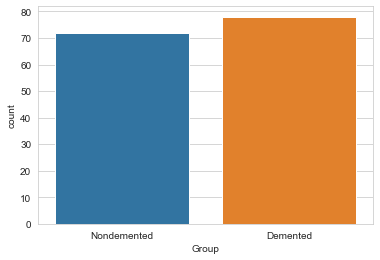

In [8]:
df_count = df.loc[df['Visit'] == 1]
df_count['Group'] = df_count['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
sns.set_style("whitegrid")
sns.countplot(x='Group', data=df_count)

In [9]:
df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1) # Drop unnecessary columns

In [10]:
def bar_chart(feature):
    Demented = df_count[df_count['Group']=='Demented'][feature].value_counts()
    Nondemented = df_count[df_count['Group']=='Nondemented'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
    print(df_bar)

              M   F
Demented     40  38
Nondemented  22  50


Text(0.5, 1.0, 'Gender and Demented rate')

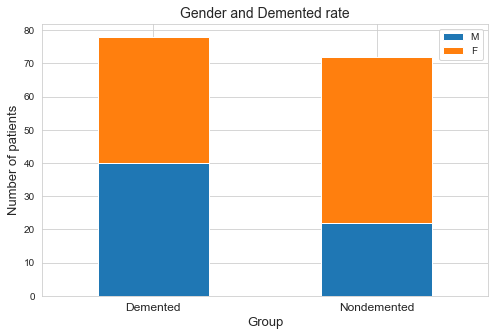

In [11]:
#Gender and Group
bar_chart('M/F')
plt.xlabel('Group',fontsize=13)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of patients',fontsize=13)
plt.legend()
plt.title('Gender and Demented rate',fontsize=14)

Text(0.5, 1.0, 'Mini Mental State Examination vs Group')

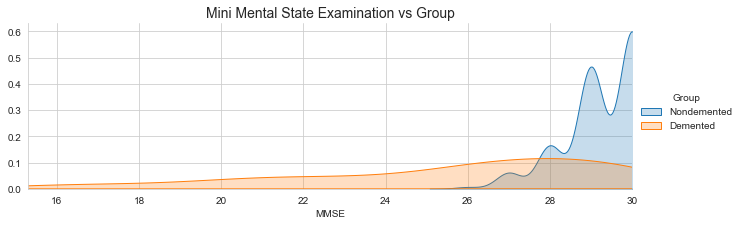

In [12]:
#MMSE and Group
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)
plt.title('Mini Mental State Examination vs Group',fontsize=14)

Text(0.5, 1.0, 'Age vs Group')

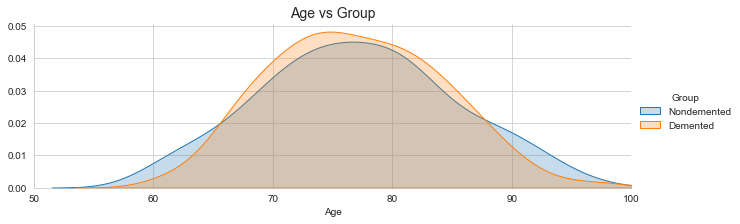

In [13]:
#Age and Group
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)
plt.title('Age vs Group',fontsize=14)

Text(0.5, 1.0, 'Years of Education vs Group')

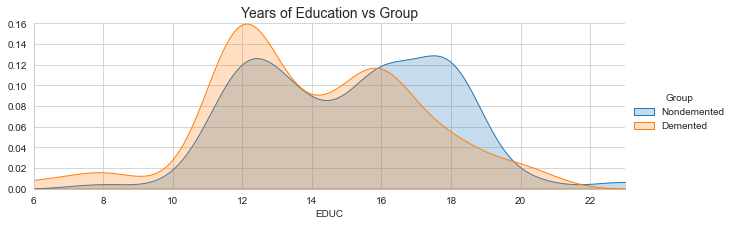

In [14]:
#EDUC and Group
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)
plt.title('Years of Education vs Group',fontsize=14)

In [15]:
#convet the charecter data into numeric
group_map = {"Demented": 1, "Nondemented": 0}

df['Group'] = df['Group'].map(group_map)
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])

In [16]:
def correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

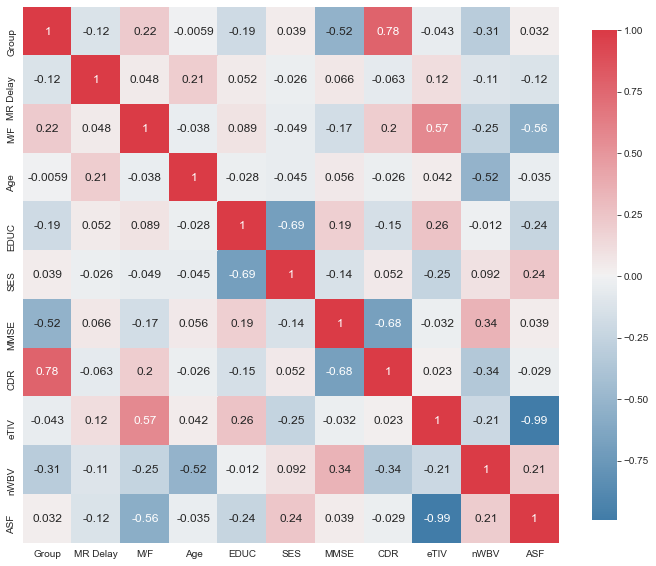

In [17]:
correlation_map(df)

In [18]:
# Encode columns into numeric
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

### Model Training

In [19]:
#currently considering features based on correlation matrix.
#following which will do an analysis of model performance without MRI anatomical values
feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"] 
predicted_class_names = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
#function for confusion matrix
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Nondemented','Demented']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [21]:
#reporting performance and defining eval metrics
def report_performance(model):
    model_test = model.predict(X_test)
    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

total_fpr = {}
total_tpr = {}

def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)
    total_fpr[str((str(model).split('(')[0]))] = fpr
    total_tpr[str((str(model).split('(')[0]))] = tpr
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
total_accuracy = {}
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu

#### Support Vector Machines



Confusion Matrix:
[[27  5]
 [13 30]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.84      0.75        32
           1       0.86      0.70      0.77        43

    accuracy                           0.76        75
   macro avg       0.77      0.77      0.76        75
weighted avg       0.78      0.76      0.76        75



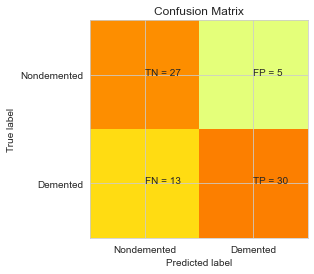

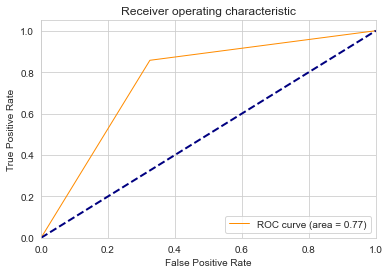


Acuuracy Of the Model:  0.76 




In [22]:
svm = SVC(kernel="linear", C=0.1,random_state=0)
svm.fit(X_train, y_train.ravel())
report_performance(svm) 
roc_curves(svm)
accuracy(svm)

#### Random Forest Classifier



Confusion Matrix:
[[26  6]
 [10 33]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        32
           1       0.85      0.77      0.80        43

    accuracy                           0.79        75
   macro avg       0.78      0.79      0.78        75
weighted avg       0.79      0.79      0.79        75



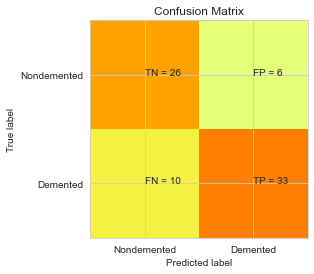

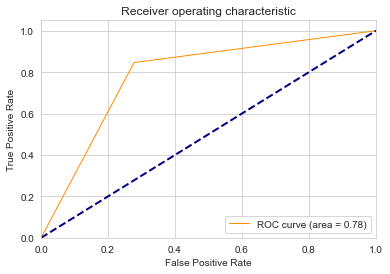


Acuuracy Of the Model:  0.7866666666666666 




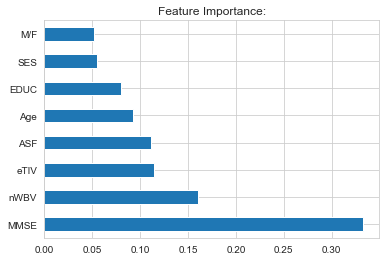

In [23]:
rfc=RandomForestClassifier(criterion='gini',max_depth=8,max_features='auto',n_estimators=200)

param_grid = { 
    'n_estimators': [200],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini']
}

rfc.fit(X_train, y_train.ravel())
report_performance(rfc) 
roc_curves(rfc)
accuracy(rfc)

feat_importances = pd.Series(rfc.feature_importances_, index=feature_col_names)
feat_importances.nlargest(8).plot(kind='barh')
plt.title("Feature Importance:")
plt.show()

#### Decision Tree 



Confusion Matrix:
[[27  5]
 [18 25]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.60      0.84      0.70        32
           1       0.83      0.58      0.68        43

    accuracy                           0.69        75
   macro avg       0.72      0.71      0.69        75
weighted avg       0.73      0.69      0.69        75



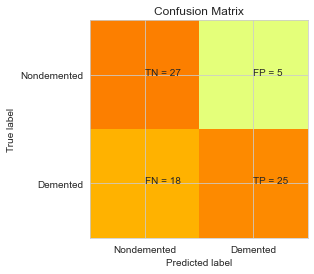

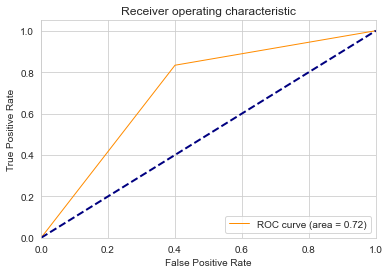


Acuuracy Of the Model:  0.6933333333333334 




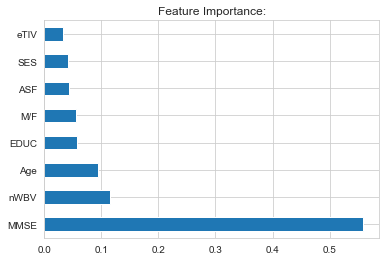

In [24]:
clf_dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
clf_dtc.fit(X_train, y_train.ravel())
report_performance(clf_dtc) 
roc_curves(clf_dtc)
accuracy(clf_dtc)

feat_importances = pd.Series(clf_dtc.feature_importances_, index=feature_col_names)
feat_importances.nlargest(8).plot(kind='barh')
plt.title("Feature Importance:")
plt.show()

#### XGBoost



Confusion Matrix:
[[26  6]
 [ 9 34]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.81      0.78        32
           1       0.85      0.79      0.82        43

    accuracy                           0.80        75
   macro avg       0.80      0.80      0.80        75
weighted avg       0.80      0.80      0.80        75



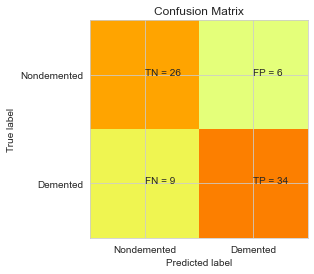

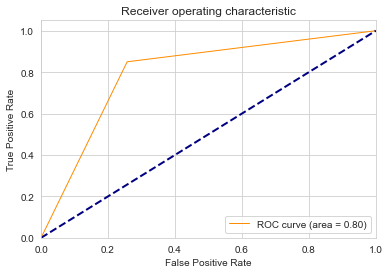


Acuuracy Of the Model:  0.8 




In [25]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [1,2,3,4,5]
        }

clf_xgb = XGBClassifier(random_state=0)
clf_xgb.fit(X_train, y_train.ravel())
report_performance(clf_xgb) 
roc_curves(clf_xgb)
accuracy(clf_xgb)

### Model Comparison

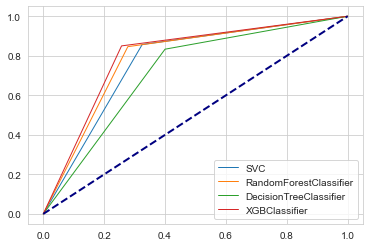

In [32]:
for i in total_fpr.keys():
    plt.plot(total_fpr[i],total_tpr[i],lw=1, label=i)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend()

##### We have seen from the above feature importance graph that the anatomical values obtained only through the process of MRI do not contribute immensely to the performance of the model. However, this is a claim as of now which I would be exploring in the next few cells. The reason behind doing this analysis is to make a decision if we can predict dementia to a certain acceptable amount for initial diagnosis just through the features other than anatomical values to save cost on the treatment procedure. Once our model predicts there is a fair chance of dementia, only then we can opt for the costly procedure of MRI for further confirmation.

In [36]:
new_feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE"] #removed brain anatomical features
new_X = df[new_feature_col_names].values
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.20, random_state=22)

##### We have seen from the previous results that XGBoost is the best performing model. Thus, just trying out that model for sanity check.



Confusion Matrix:
[[30  2]
 [ 6 37]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        32
           1       0.95      0.86      0.90        43

    accuracy                           0.89        75
   macro avg       0.89      0.90      0.89        75
weighted avg       0.90      0.89      0.89        75



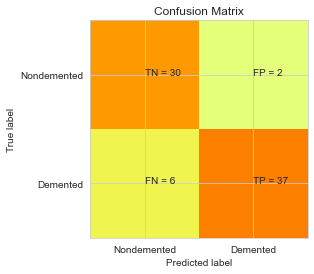

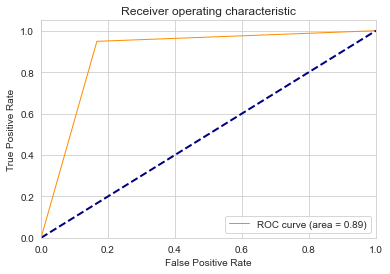


Acuuracy Of the Model:  0.8933333333333333 




In [37]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [1,2,3,4,5]
        }

clf_xgb = XGBClassifier(random_state=0)
clf_xgb.fit(X_train, y_train.ravel())
report_performance(clf_xgb) 
roc_curves(clf_xgb)
accuracy(clf_xgb)

##### It is interesting to see that the model performance has significantly increased on removing the brain anatomical values. Although the claim of whether we can predict dementia with a certain confidence just from MMSE and other demographic features needs more research, this current project can stand as a good starting point for future research.